In [1]:
import snap

## Prepare work

In [2]:
def build_small_graph():
    g_small = snap.TNGraph.New()

    g_small.AddNode(1)
    g_small.AddNode(2)
    g_small.AddNode(3)

    g_small.AddEdge(1, 2)
    g_small.AddEdge(2, 1)
    g_small.AddEdge(1, 3)
    g_small.AddEdge(1, 1)

    return g_small

In [3]:
g_small = build_small_graph()

In [4]:
g_wiki = snap.LoadEdgeList_PNGraph("Wiki-Vote.txt")

In [5]:
def run_result(g_real, g_small, f):
    print(f"The result of test data is: {f(g_small)}")
    print(f"The result of real data is: {f(g_real)}")

## Analyzing the Wikipedia voters network

In [6]:
def run_result_for_wiki_votes(f):
    run_result(g_wiki, g_small, f)

### 1. The number of nodes in the network

In [7]:
def number_of_nodes(g: snap.PNGraph):
    return g.GetNodes()

In [8]:
run_result_for_wiki_votes(number_of_nodes)

The result of test data is: 3
The result of real data is: 7115


### 2. The number of nodes with a self-edge(self-loop)

In [9]:
def number_of_self_loop(g: snap.PNGraph):
    return snap.CntSelfEdges(g)

In [10]:
run_result_for_wiki_votes(number_of_self_loop)

The result of test data is: 1
The result of real data is: 0


### 3. The number of directed edges in the network. (The number of ordered pairs $(a, b) \in E$ for which $a \neq b$)

In [11]:
def number_of_directed_edges(g: snap.PNGraph):
    return snap.CntUniqDirEdges(g)

In [12]:
run_result_for_wiki_votes(number_of_directed_edges)

The result of test data is: 3
The result of real data is: 103689


### 4. The number of undirected edges in the network. (The number of unique unordered pairs $(a, b), a \neq b$, for which $(a, b) \in E or (b, a) \in E $ (or both)). If both (a, b) and (b, a) are edges, this counts a single undirected edges

In [13]:
def number_of_undirected_edges(g: snap.PNGraph):
    return snap.CntUniqUndirEdges(g)

In [14]:
run_result_for_wiki_votes(number_of_undirected_edges)

The result of test data is: 2
The result of real data is: 100762


### 5. The number of reciprocated edges in the network. (The number of unique unorded pairs of nodes $(a,b)$, $a\neq b$, for which $(a, b) \in E$ and $(b, a)\in E$)

In [15]:
def number_of_reciprocated_edges(g: snap.PNGraph):
    return snap.CntUniqBiDirEdges(g)

In [16]:
run_result_for_wiki_votes(number_of_reciprocated_edges)

The result of test data is: 1
The result of real data is: 2927


### 6. The number of nodes of zero out-degree

In [17]:
def number_of_nodes_of_zero_out_degree(g: snap.PNGraph):
    deg_cnt_pr = snap.TIntPrV()
    snap.GetOutDegCnt(g, deg_cnt_pr)
    for item in deg_cnt_pr:
        if item.GetVal1() == 0:
            return item.GetVal2()
    return 0

In [18]:
run_result_for_wiki_votes(number_of_nodes_of_zero_out_degree)

The result of test data is: 1
The result of real data is: 1005


### 7. The number of nodes of zero in-degree

In [19]:
def number_of_nodes_of_zero_in_degree(g: snap.PNGraph):
    deg_cnt_pr = snap.TIntPrV()
    snap.GetInDegCnt(g, deg_cnt_pr)
    for item in deg_cnt_pr:
        if item.GetVal1() == 0:
            return item.GetVal2()
    return 0

In [20]:
run_result_for_wiki_votes(number_of_nodes_of_zero_in_degree)

The result of test data is: 0
The result of real data is: 4734


### 8. The number of nodes with more than 10 outgoing edges

In [21]:
def number_of_nodes_with_ten_more_out_degree(g: snap.PNGraph):
    deg_cnt_pr = snap.TIntPrV()
    snap.GetOutDegCnt(g, deg_cnt_pr)
    cnt = 0
    for item in deg_cnt_pr:
        if item.GetVal1() > 10:
            cnt += item.GetVal2()
    return cnt

In [22]:
run_result_for_wiki_votes(number_of_nodes_with_ten_more_out_degree)

The result of test data is: 0
The result of real data is: 1612


### 9. The number of nodes with fewer than 10 incoming edges

In [23]:
def number_of_nodes_with_ten_fewer_in_degree(g: snap.PNGraph):
    deg_cnt_pr = snap.TIntPrV()
    snap.GetInDegCnt(g, deg_cnt_pr)
    cnt = 0
    for item in deg_cnt_pr:
        if item.GetVal1() < 10:
            cnt += item.GetVal2()
    return cnt

In [24]:
run_result_for_wiki_votes(number_of_nodes_with_ten_fewer_in_degree)

The result of test data is: 3
The result of real data is: 5165


## Futher analyzing the Wikipedia voters network

### 1. Plot data

In [25]:
import numpy as np
import matplotlib.pyplot as plt

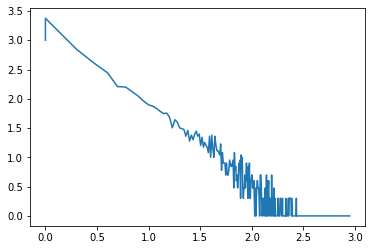

In [26]:
deg_cnt_pr = snap.TIntPrV()
snap.GetOutDegCnt(g_wiki, deg_cnt_pr)
x = []
y = []
for item in deg_cnt_pr:
    if item.GetVal1() == 0:
        x.append(0.0)
    else:
        x.append(np.log10(item.GetVal1()))
    y.append(np.log10(item.GetVal2()))
plt.plot(x, y)


### 2. Fit data

The coefficients of a is -1.2764599647257473 and b is 3.1227358640570393


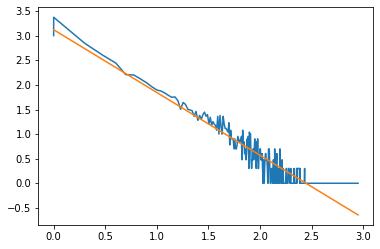

In [27]:
data_x = np.array(x)
data_y = np.array(y)
param = np.polyfit(x, y, 1)
z = data_x * param[0] + param[1]
plt.plot(x, y)
plt.plot(x, z)

print(f"The coefficients of a is {param[0]} and b is {param[1]}")

## Finding experts on the Java programming language on StakOverflow

In [28]:
# There exists duplicate edges. We must use Network instand Graph
g_java = snap.LoadEdgeList_PNEANet("stackoverflow-Java.txt")

In [33]:
print(g_java.GetEdges())

358867


### 1. The number of weakly connected components in the network

In [29]:
com = snap.TCnComV()
snap.GetWccs(g_java, com)
print(f"The number of weakly connected components in the network is {com.Len()}")

The number of weakly connected components in the network is 10143


### 2. The number of edges and the number of nodes in the largest weakly connected component

In [30]:
max_wcc = snap.GetMxWcc(g_java)
print(f"The number of edges in the largest weakly connected component is {max_wcc.GetEdges()}")
print(f"The number of nodes in the largest weakly connected component is {max_wcc.GetNodes()}")

The number of edges in the largest weakly connected component is 347297
The number of nodes in the largest weakly connected component is 131188


### 3. IDs of the top 3 most central nodes in the network by PageRank scores

In [31]:
page_rank_h = snap.TIntFltH()
snap.GetPageRank(g_java, page_rank_h)
page_rank_h.SortByDat(False)
idx = 0
for item in page_rank_h:
    print(item, page_rank_h[item])
    idx += 1
    if idx >= 3:
        break

992484 0.014487640265633013
135152 0.009713897354211635
139985 0.0075449138999974545


### 4. IDs of the top 3 hubs and top 3 authorities in the network by HITS scores

In [32]:
nid_hub_h = snap.TIntFltH()
nid_auth_h = snap.TIntFltH()
snap.GetHits(g_java, nid_hub_h, nid_auth_h)
nid_hub_h.SortByDat(False)
nid_auth_h.SortByDat(False)

print("IDs of the top 3 hubs")
idx = 0
for item in nid_hub_h:
    print(item, nid_hub_h[item])
    idx += 1
    if idx >= 3:
        break

print()
print("IDs of the top 3 authorities")
idx = 0
for item in nid_auth_h:
    print(item, nid_auth_h[item])
    idx += 1
    if idx >= 3:
        break

IDs of the top 3 hubs
614141 0.25893819769439114
240337 0.17952104555814175
100516 0.16955401992174304

IDs of the top 3 authorities
157882 0.7990595928120374
22656 0.312252491402458
203907 0.21661194242000273
